<a href="https://colab.research.google.com/github/DrorEttlingerLevy/DS_Course/blob/main/Project_1_Naya_Collage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Management Application of Fields for Growers

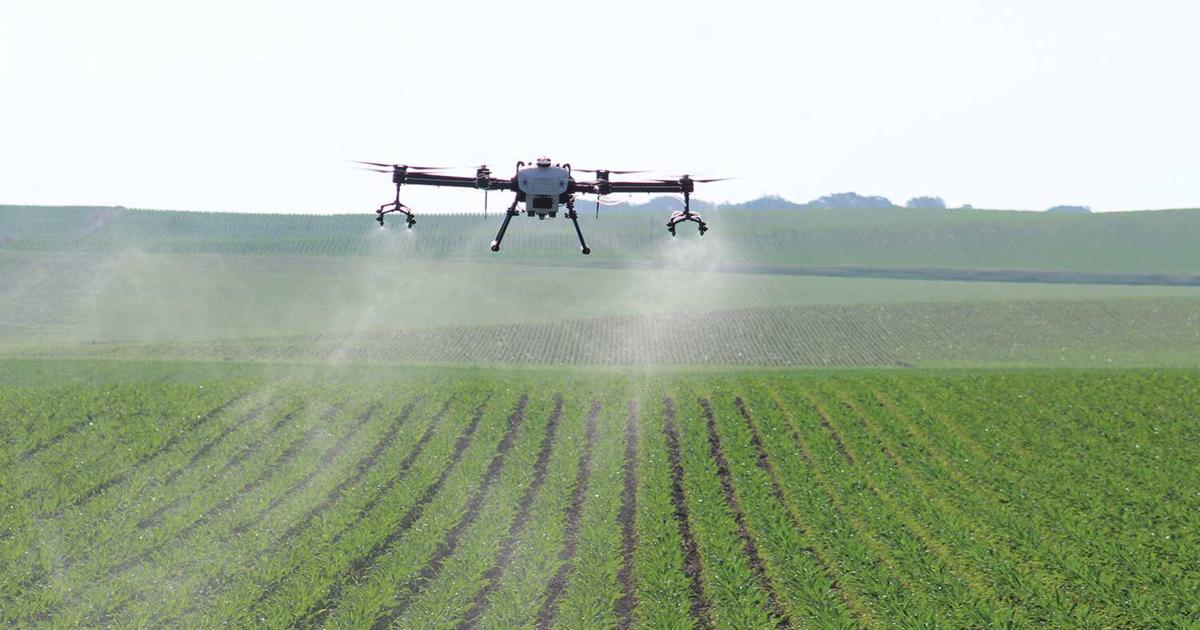

In [10]:
from dataclasses import dataclass, fields, field
from datetime import datetime, timedelta
from math import pi, floor
import re
from tabulate import tabulate
from functools import reduce

### Background

This algorithm was developed to assist farmers in efficiently managing their fields. The main users are farmers who grow multiple fields of potatoes, corn, and soybeans in the same growing season.

The main purpose is to provide comprehensive monitoring of field data throughout the growing season, seeding quantities, fertilization amounts, harvest dates and expected profits.


### Crop Information Class

This class contains detailed information about each crop. The attributes include:

- **Name**: The name of the crop.
- **Planting Spaces**: Recommended spacing for planting, for rows and between the rows.
- **Market Value**: The current market value of the crop.
- **Fertilizing Recommendations**: Suggested fertilization practices.
- **Common Pests and Diseases**: Typical pests and diseases affecting the crop.
- **Days to harvest**: Average days until harvesting.
- **Amount of crop (ton) per acer**: Expected weight of yield.
- **Cost of 1 seed**: Cost of 1 seed in dollars ($).

Additionally, this class provides a stand-alone report summarizing all the documented crops supported by the algorithm.

* All data for crops provided here is estimated for the project.

In [11]:
@dataclass
class Crop:
    crop_name: str = ''
    crop_planting_spaces: list = field(default_factory= lambda:[])
    crop_value_in_market: float = 0.0
    crop_fertilizing_requirements_NPK: list = field(default_factory= lambda:[])
    crop_common_pest: list = field(default_factory= lambda:[])
    crop_common_disease: list = field(default_factory= lambda:[])
    crop_average_days_to_harvest: int = 0
    crop_ton_per_acer: int=0
    crop_cost_per_seed: float=0.0

@dataclass
class All_Crops:
    all_crops_dict: dict = field(default_factory= lambda:{})

def crop_data_table():
  formatted_data = []
  crops_data= list(all_crops.all_crops_dict.items())
  for crop, crop_obj in crops_data:
    crop_name = crop_obj.crop_name
    crop_value = format(crop_obj.crop_value_in_market,",")
    crop_common_pest = ', '.join(crop_obj.crop_common_pest)
    crop_common_disease = ', '.join(crop_obj.crop_common_disease)
    crop_fertilizers_N = crop_obj.crop_fertilizing_requirements_NPK[0]
    crop_fertilizers_P = crop_obj.crop_fertilizing_requirements_NPK[1]
    crop_fertilizers_K = crop_obj.crop_fertilizing_requirements_NPK[2]
    formatted_data.append([crop_name,crop_value,crop_common_pest,
                           crop_common_disease,crop_fertilizers_N,
                           crop_fertilizers_P,crop_fertilizers_K])
  headers = ['Crop', 'Value ($)','Common Pest','Common Disease',
             'N kg/acer','P kg/acer','K kg/acer']
  return print(tabulate(formatted_data , headers=headers, tablefmt="pipe"))


In [14]:
data_crops = [
    ["Crop", "Planting Spaces (between rows, between plants) in cm",
     "Market Value (per ton) in $", "Fertilizing Requirements (Nitrogen, Phosphorus, Potassium) (kg/acer)",
     "Common Pests", "Common Diseases", "Average Days to Harvest",
     "Ton Yield per Acer","Cost per Seed"],
    ["Potato", "100,30", "250", "125,75,175", "Colorado potato beetle",
     "Late blight,Early blight","90","20","0.03"],
    ["Corn", "90,30", "200", "150,60,120", "Corn rootworm",
     "Northern corn leaf blight","100","10","0.04"],
    ["Soy", "75,15", "350", "80,40,70", "Soybean aphid",
     "Soybean rust","120","3","0.02"]
]

with open('crop_info.txt', 'w') as file:
    for line in data_crops:
        file.write('|'.join(line) + '\n')

acres = 4047

In [15]:
with open ('crop_info.txt','r') as crops_data:
  lines_crops = crops_data.readlines()
crops_tuples = list(map(lambda i:tuple(i.strip().split('|')),lines_crops[1:]))
crops_by_index = list(enumerate(crops_tuples))

all_crops = All_Crops()

for index, data in crops_by_index:
  crop_name = str(data[0]).lower()
  crop_planting_spaces = data[1].split(',')
  crop_value_in_market = float(data[2])
  crop_fertilizing_requirements_NPK = list(data[3].split(','))
  crop_common_pest = list(data[4].lower().split(','))
  crop_common_disease = list(data[5].lower().split(','))
  crop_average_days_to_harvest = timedelta(days=int(data[6]))
  crop_ton_per_acer = int(data[7])
  crop_cost_per_seed = float(data[8])

  all_crops.all_crops_dict[f'{data[0].lower()}'] = Crop(
        crop_name=crop_name,
        crop_planting_spaces=crop_planting_spaces,
        crop_value_in_market=crop_value_in_market,
        crop_fertilizing_requirements_NPK=crop_fertilizing_requirements_NPK,
        crop_common_pest=crop_common_pest,
        crop_common_disease=crop_common_disease,
        crop_average_days_to_harvest=crop_average_days_to_harvest,
        crop_ton_per_acer=crop_ton_per_acer,
        crop_cost_per_seed=crop_cost_per_seed
    )

A demo for information on all the crops that the algorithm supports.

In [16]:
crop_data_table()

| Crop   |   Value ($) | Common Pest            | Common Disease            |   N kg/acer |   P kg/acer |   K kg/acer |
|:-------|------------:|:-----------------------|:--------------------------|------------:|------------:|------------:|
| potato |         250 | colorado potato beetle | late blight, early blight |         125 |          75 |         175 |
| corn   |         200 | corn rootworm          | northern corn leaf blight |         150 |          60 |         120 |
| soy    |         350 | soybean aphid          | soybean rust              |          80 |          40 |          70 |


### Fertilizers
Fertilizer costs are listed in dollars per kilogram for each individual nutrient: nitrogen, phosphate, and potassium. Although fertilizers typically combine these nutrients, for the purposes of this algorithm, we have separated the costs and assumed that each nutrient is applied individually.

In [ ]:
@dataclass
class Fertilizer:
    nitrogen_cost: float =  2.1
    phosphorus_cost: float = 2
    potassium_cost: float = 1.3

fertilizers = Fertilizer()

### Field Information Class

This class contains detailed information about each field. It includes the following attributes:

- **grower_name**: The name of the grower.
- **crop_in_field**: An instance of the `Crop` class representing the crop planted in the field.
- **field_dimensions**: The dimensions of the field.
- **field_shape**: A string representing the shape of the field (e.g., `Rectangular` or `Circular`).
- **field_location**: A tuple representing the location of the field.
- **date_of_planting**: A `datetime` object representing the date when the crop was planted.
- **area**: Calculates and returns the area of the field based on its dimensions and shape.
- **amount_of_crops_per_field**: Calculates and returns the number of crops that can be planted in the field based on its area and the planting space required for the crop.
- **field_cost_of_fertilizers**: Calculates and returns the cost of fertilizers required for the field based on the nutrient requirements of the crop.
- **field_cost_of_seeds**: Calculates and returns the cost of seeds required for the field.
- **field_profit**: Calculates and returns the profit from the field based on crop yield, market value, and expenses.
- **field_date_of_harvest**: Calculates and returns the expected harvest date based on the planting date and the crop's average days to harvest.


In [ ]:
@dataclass
class Fields:
    grower_name: str = ''
    crop_in_field: Crop = field(default_factory=Crop)
    field_dimensions: list[float] = field(default_factory=list[float])
    field_shape: str = ''
    field_location: tuple= field(default_factory=tuple)
    date_of_planting: datetime = None

    @property
    def area(self):
        if self.field_shape == "rectangular":
           lenght, width = self.field_dimensions
           return round(lenght * width / acres)
        elif self.field_shape == "circular":
            radius = self.field_dimensions[0]
            return round(radius**2*pi/acres)
        else:
          return 0

    @property
    def amount_of_crops_per_field(self):
      area_in_meters = self.area*acres
      crop_row = float(self.crop_in_field.crop_planting_spaces[0])/100
      crop_column = float(self.crop_in_field.crop_planting_spaces[1])/100
      space_per_crop = crop_row*crop_column
      return floor(area_in_meters/space_per_crop)

    @property
    def field_cost_of_fertilizers(self):
      fertilizing_requirements_N= float(self.crop_in_field.crop_fertilizing_requirements_NPK[0])
      fertilizing_requirements_P= float(self.crop_in_field.crop_fertilizing_requirements_NPK[1])
      fertilizing_requirements_K= float(self.crop_in_field.crop_fertilizing_requirements_NPK[2])
      fertilizer_cost_per_filed_N= fertilizing_requirements_N*fertilizers.nitrogen_cost
      fertilizer_cost_per_filed_p= fertilizing_requirements_P*fertilizers.phosphorus_cost
      fertilizer_cost_per_filed_k= fertilizing_requirements_K*fertilizers.potassium_cost
      total_cost_fertilizers_per_acer= fertilizer_cost_per_filed_N+fertilizer_cost_per_filed_p+fertilizer_cost_per_filed_k
      return round(self.area*total_cost_fertilizers_per_acer, 0)

    @property
    def field_cost_of_seeds(self):
      cost_of_seeds_per_field= self.amount_of_crops_per_field*self.crop_in_field.crop_cost_per_seed
      return cost_of_seeds_per_field

    @property
    def field_profit(self):
      ton_of_crop = self.crop_in_field.crop_ton_per_acer*self.area
      profit_per_field = ton_of_crop*self.crop_in_field.crop_value_in_market
      expenses = self.field_cost_of_seeds + self.field_cost_of_fertilizers
      return round(profit_per_field-expenses)

    @property
    def field_date_of_harvest(self):
      harvest_date = self.date_of_planting + self.crop_in_field.crop_average_days_to_harvest
      return harvest_date.strftime("%d-%m-%y")

@dataclass
class All_Fields:
    all_fields_dict: dict = field(default_factory= lambda:{})

In [ ]:
with open ('fields_data.txt','r') as fields_data:
  lines_fields = fields_data.readlines()

lines_fields = list(map(lambda line:line.lower().strip().split(','), lines_fields))
lines_fields = list(enumerate(lines_fields[1:]))
all_fields = All_Fields()

for index, data in lines_fields:
  try:
    if data[1] not in list(all_crops.all_crops_dict.keys()):
        raise ValueError(f"This algo does not support this crop: {data[1]}")
    if not (re.match(r'^\d+$', data[2]) or re.match(r'^\d+\s*x\s*\d+$', data[2].replace(" ", ""))):
        raise ValueError()
    if data[3] not in ["rectangular", "circular"]:
        raise ValueError(f"This algo does not support this shape: {data[3]}")
    if not re.compile(r'\d{4}-\d{2}-\d{2}').search(data[6]):
        raise ValueError(f"Please write the right a data format: {data[6]}")

    grower_name = data[0]
    crop_in_field = data[1]
    for crop_name in list(all_crops.all_crops_dict.keys()):
      if crop_in_field == crop_name:
        crop_in_field = all_crops.all_crops_dict[str(crop_in_field)]
    field_dimensions = [float(number) for number in data[2].split('x')]
    field_shape = data[3]
    field_location = float(data[4]),float(data[5])
    data_int = list(map(lambda i:int(i), data[6].split('-')))
    year = data_int[0]
    month = data_int[1]
    day = data_int[2]
    date_of_planting = datetime(year,month,day)
    all_fields.all_fields_dict[f'field{index+1}'] = Fields(
          grower_name=grower_name,
          crop_in_field=crop_in_field,
          field_dimensions=field_dimensions,
          field_shape=field_shape,
          field_location=field_location,
          date_of_planting=date_of_planting)
  except Exception as e:
        print(f"Error in line {index+1}, the data {data}: {e}")

### Growes Information Class
This class is designed for growers to produce tables summarizing all fields and data for a specific farmer, including the total profit and data for all fields throughout the season.

In [ ]:
@dataclass
class Grower:
    fields_of_grower: dict = field(default_factory= lambda:{})

In [ ]:
set_of_growers = set(list(map(lambda field:field.grower_name,all_fields.all_fields_dict.values())))
all_growers = {}

for grower_name in set_of_growers:
  all_growers[f'{grower_name}'] = {}

for field_name, field_class in all_fields.all_fields_dict.items():
  for key in all_growers.keys():
    if field_class.grower_name == key:
      all_growers[f'{field_class.grower_name}'][field_name] = field_class

In [ ]:
def grower_info(grower_name):
  formatted_data = []
  data_for_grower = list(all_growers[grower_name].items())
  for field, fields_obj in data_for_grower:
      grower_crops = fields_obj.crop_in_field.crop_name
      grower_area = fields_obj.area
      grower_date_of_harvest = fields_obj.field_date_of_harvest
      grower_profit = format(fields_obj.field_profit,",")
      grower_yield = format(fields_obj.crop_in_field.crop_ton_per_acer*fields_obj.area,",")
      formatted_data.append([field, grower_crops,grower_area,grower_date_of_harvest,grower_profit,grower_yield])
  sorted_data = sorted(formatted_data, key=lambda x: datetime.strptime(x[3], '%d-%m-%y'))
  headers = ['Field', 'Crop','Area (acers)','Harvest Date','Grower Profit($)','Yield (ton)']
  return print(tabulate(sorted_data, headers=headers, tablefmt="fancy_grid"))

In [ ]:
def grower_info_sum(grower_name):
  formatted_data = []
  data_for_grower = list(all_growers[grower_name].items())
  for field, fields_obj in data_for_grower:
    grower_area = format(fields_obj.area,",")
    grower_profit = format(fields_obj.field_profit,",")
    grower_yield = format(fields_obj.crop_in_field.crop_ton_per_acer*fields_obj.area,",")
    formatted_data.append([grower_area,grower_profit,grower_yield])
  area_list = [float(i[0].replace(',','')) for i in formatted_data]
  profit_list = [float(i[1].replace(',','')) for i in formatted_data]
  yield_list = [float(i[2].replace(',','')) for i in formatted_data]
  sums = [format(sum(area_list),','),sum(profit_list)/1000000,format(sum(yield_list),',')]
  sums_table = [sums]
  headers = ['Total Area (Acers)', 'Sum of Profit (M$)','Sum of Yield (Ton)']
  return print(tabulate(sums_table, headers=headers, tablefmt="fancy_grid"))


In [ ]:
#while True:
  #user_grower = input("Please enter the grower's name: ")
  #try:
    #if user_grower not in set_of_growers:
      #raise ValueError
    #else:
      #break
  #except:
    #print("There is no info about this grower, please try again.")

grower_info('grower1')
grower_info_sum('grower1')

╒═════════╤════════╤════════════════╤════════════════╤════════════════════╤═══════════════╕
│ Field   │ Crop   │   Area (acers) │ Harvest Date   │ Grower Profit($)   │ Yield (ton)   │
╞═════════╪════════╪════════════════╪════════════════╪════════════════════╪═══════════════╡
│ field2  │ potato │            776 │ 01-07-23       │ 3,069,313          │ 15,520        │
├─────────┼────────┼────────────────┼────────────────┼────────────────────┼───────────────┤
│ field5  │ potato │            489 │ 04-07-23       │ 1,934,142          │ 9,780         │
├─────────┼────────┼────────────────┼────────────────┼────────────────────┼───────────────┤
│ field8  │ potato │           1747 │ 07-07-23       │ 6,909,909          │ 34,940        │
├─────────┼────────┼────────────────┼────────────────┼────────────────────┼───────────────┤
│ field1  │ corn   │            463 │ 10-07-23       │ 374,773            │ 4,630         │
├─────────┼────────┼────────────────┼────────────────┼────────────────────┼─────